# Previsão de Churn

***
## 1. Análise Exploratória dos Dados

### Objetivo:
- Conhecer os dados apresentados
- Descrevê-los graficamente e gerar suas estatísticas descritivas

****
### Inputação dos dados


In [1]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Configuração de paleta de cores dos gráficos
red = '#CD5C5C'
blue = '#6495ED'
green = '#90EE90'
colors = [red, blue, green]

In [2]:
# Buscar dados do arquivo CSV
csv_file = "../data/01_raw/Abandono_clientes (11).csv"
df = pd.read_csv(csv_file)
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Features:

- CustomerId: identificação do cliente;
- Surname: sobrenome do cliente;
- CreditScore: pontuação de crédito: 0=alto risco de inadimplência; 1000=baixo risco de inadimplência;
- Geography: país do cliente;
- Gender: sexo do cliente;
- Age: idade do cleinte;
- Tenure: indicativo de estabilidade no emprego. 0=pouca estabilidade; 10=muita estabilidade. 
- Balance: saldo da conta corrente;
- NumOfProducts: quantidade de produtos bancários adquiridos;
- HasCrCard: se tem cartão de credito. 1=sim; 0=não;
- IsActiveMember: se o cliente tem conta ativa. 1=ativo; 0=inativo;
- EstimatedSalary: salário estimado;
- Exited: se cliente deixou de ser cliente. 1=churn; 0=ainda cliente -> Alvo.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Observações sobre os clientes dessa instituição financeira:
- Tem em média 39 anos - idade mínima = 18 anos e idade máxima = 92 anos;
- A pontuação de crédito fica em torno de 650 pontos;
- O índice médio de estabilidade de emprego é 5;
- Tem em média $ 76.000 mil dólares na conta;
- Possuem em média 1,5 produtos da instituição financeira;
- O salário médio anual estimado é de $ 100.000 dólares;
- 70% dos clientes possuem cartão de crédito;
- 51% são ativos na instituição financeira; 
- 20% dos clientes cancelaram o contrato - churn. 

### Distribuição das variáveis

Com os histogramas abaixo é possível observar a distribuição dos dados de acordo com a frequência.

Por exemplo, o gráfico com "CreditScore" mostra que a maioria dos clientes tem score entre 600 e 700. E o gráfico de idade mostra que a maioria dos clientes tem ate 40 anos. 

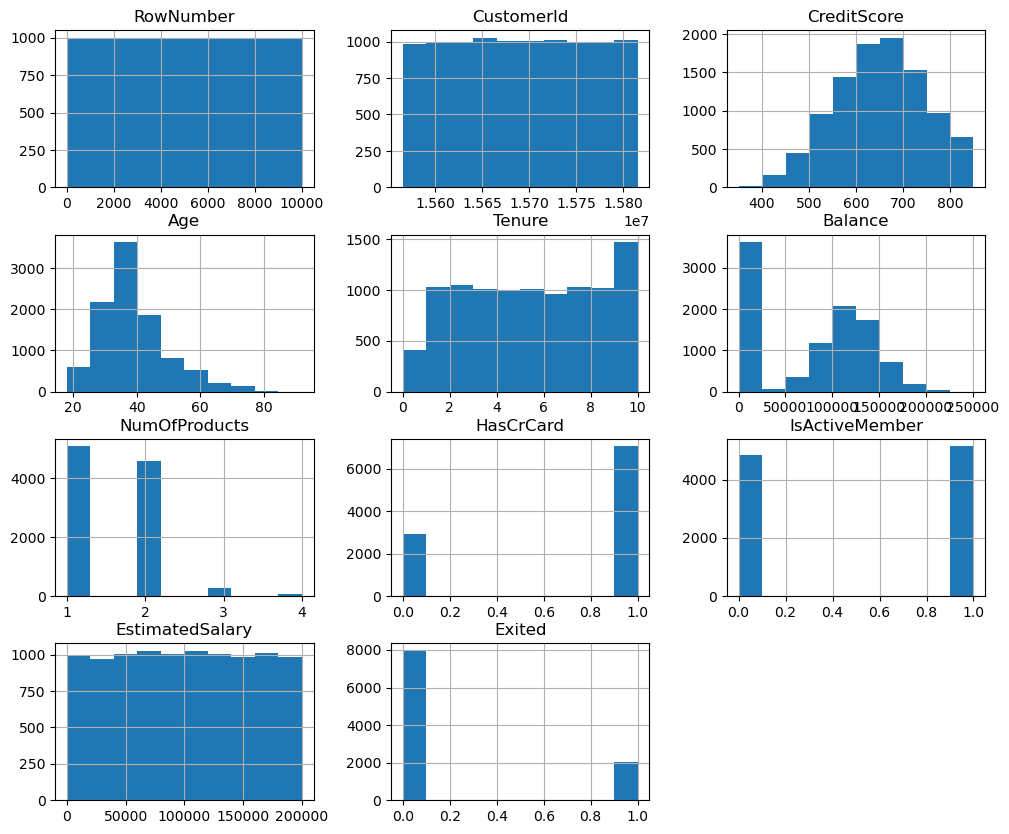

In [5]:
df.hist(figsize=(12,10));

### Distribuição das Variáveis Numéricas

Os histogramas abaixo mostram as frequências das variáveis numéricas, com a diferenciação da classe "Exited".

Com essa representação, é possível notar por exemplo que, a média da idade dos clientes que sairam do banco é maior que a média da idade dos clientes que não sairam. 

In [6]:
# Renomeia para facilitar a visualização e interpretação
df['Exited_cat'] = df['Exited'].replace([0,1], ['Não','Sim'])
x_cont = ['CreditScore', 'Balance', 'Age', 'EstimatedSalary', 'Tenure', 'NumOfProducts']

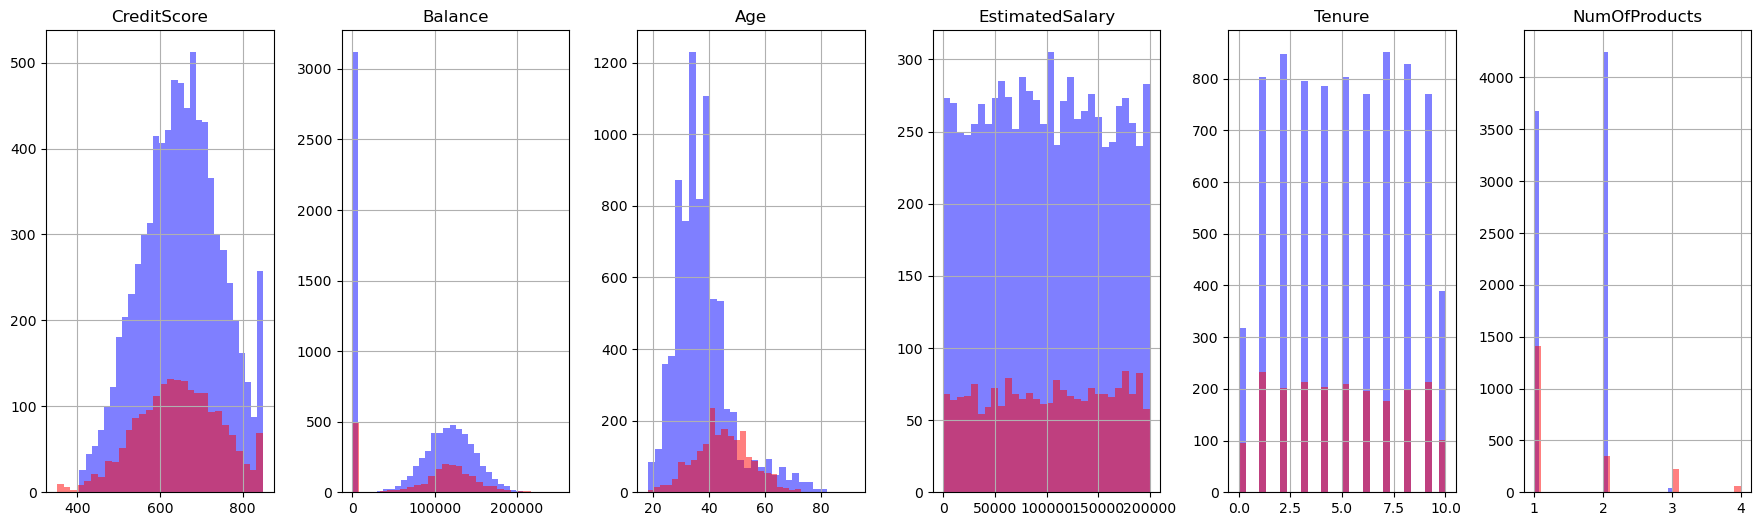

In [7]:
fig, ax = plt.subplots(1, 6, figsize=(22, 6))
df[df.Exited_cat == "Não"][x_cont].hist( bins=30, color="blue", alpha=0.5, ax=ax);
df[df.Exited_cat == "Sim"][x_cont].hist( bins=30, color="red", alpha=0.5, ax=ax);

## Relação entre as variáveis contínuas

Os gráficos de dispersão abaixo apresentam a relação entre cada uma das variáveis contínuas.

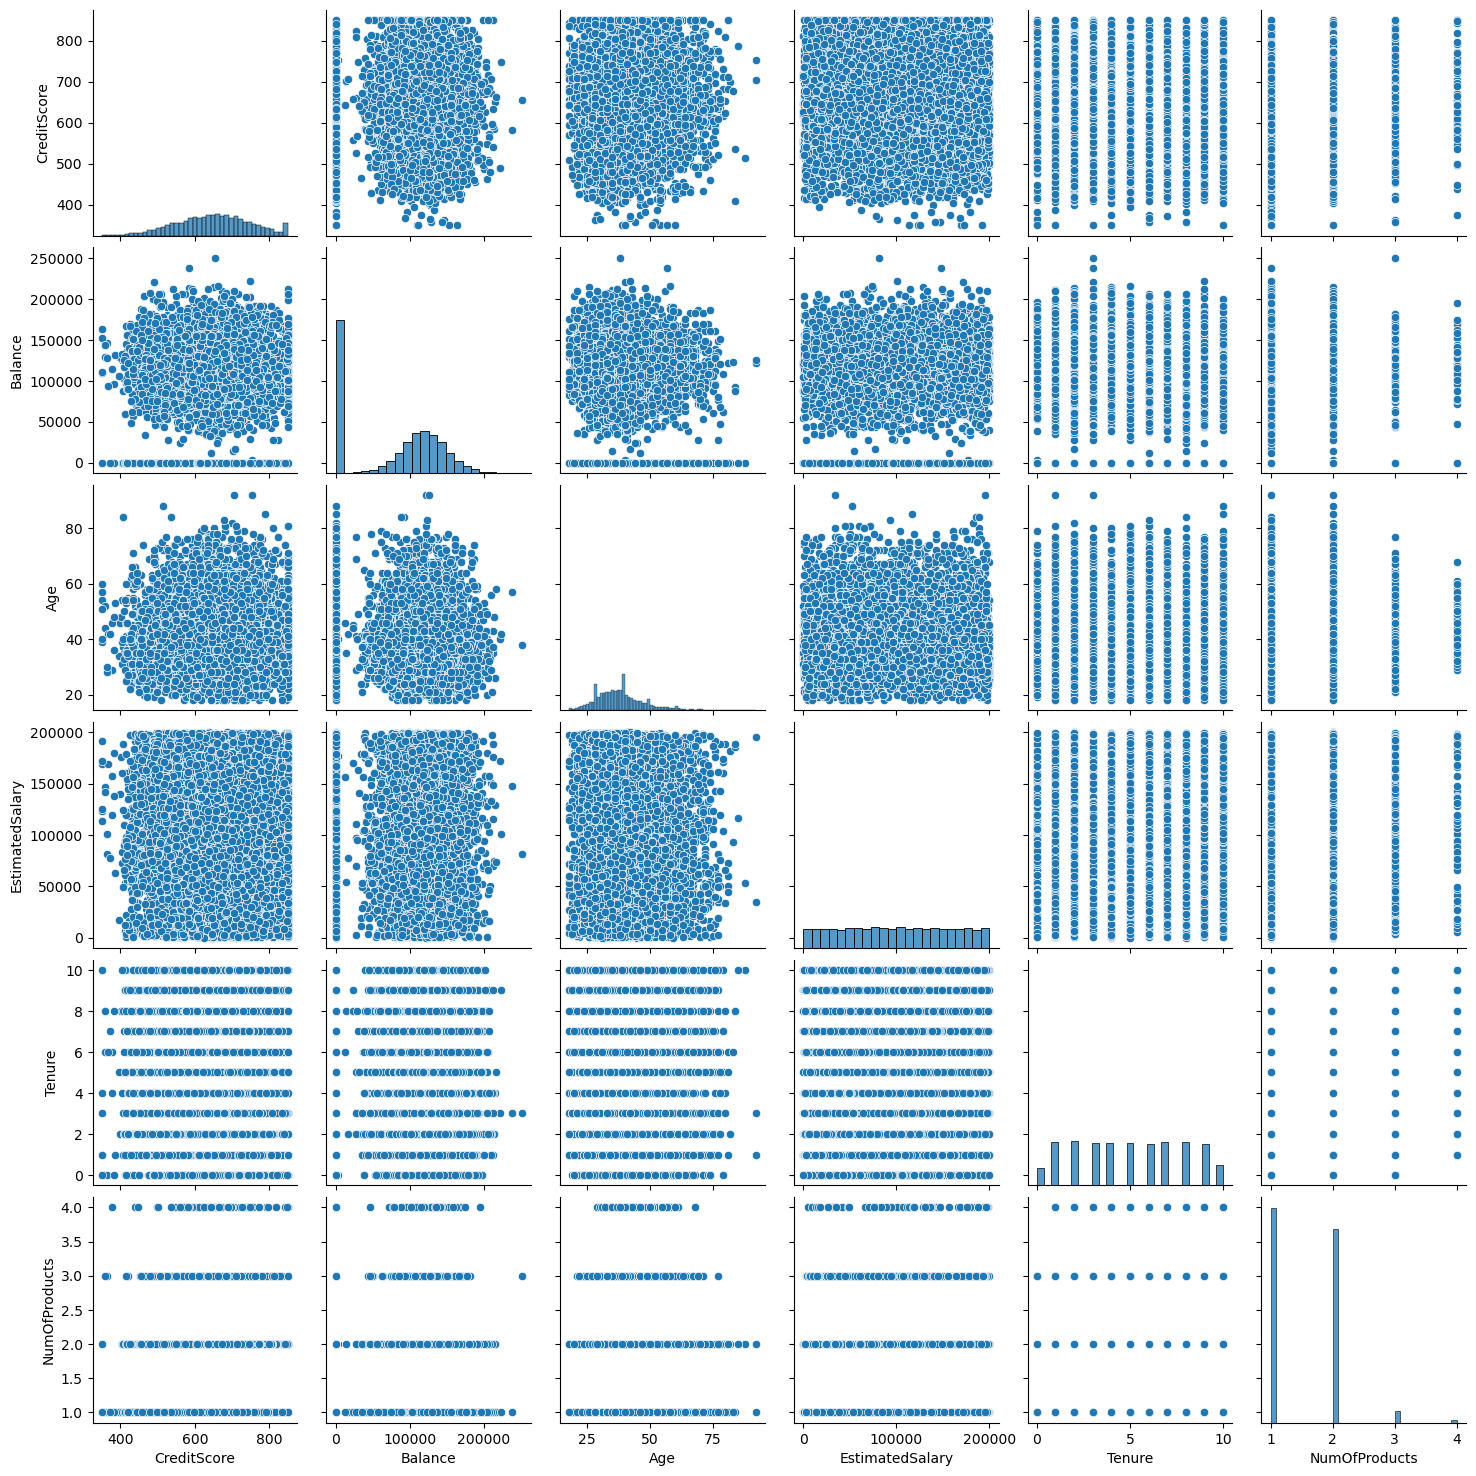

In [30]:
import seaborn as sns

sns.pairplot(df[x_cont]);

## Perfil de clientes que cancelaram o contrato (Churn)

Porcentagem de clientes que sairam da instituição: 20.37 %


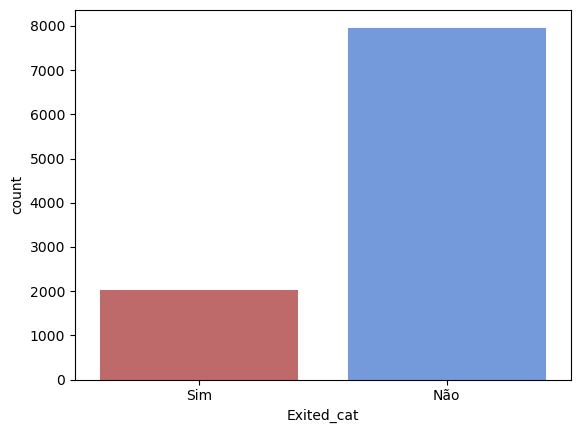

In [8]:
# porcentagem de clientes que sairam da instituição
porcent_churn = df["Exited"].sum() / df["Exited"].count() * 100
print(f'Porcentagem de clientes que sairam da instituição: {round(porcent_churn, 2)} %')

sns.countplot(data=df, x='Exited_cat', palette=colors);

### Variáveis Categóricas

Para observar as variáveis categóricas, optei por agrupar os dados em cada uma das categorias e plotar em gráficos de barra. Com isso, é possível observar qual categoria de cada feature tem mais indivíduos que saíram do banco.

* Variável Sexo

In [9]:
# Renomeia para facilitar a visualização e interpretação
df['Gender'] = df['Gender'].replace(['Female','Male'], ['Feminino','Masculino'])

df_plot = df.groupby('Gender')['Exited'].mean().reset_index() 
df_plot

,Gender,Exited
0,Feminino,0.250715
1,Masculino,0.164559


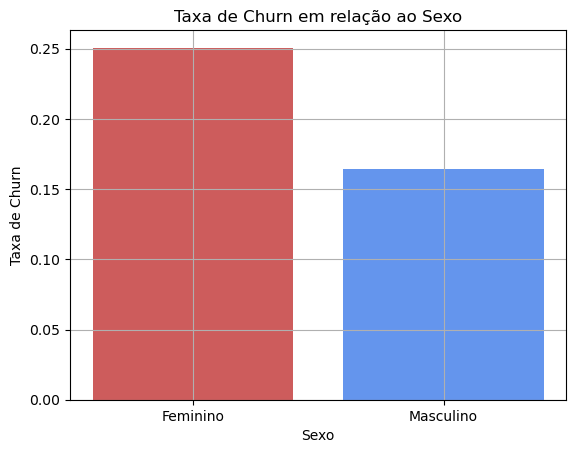

In [10]:
# Plota sexo em relação a variável alvo
x = df_plot['Gender']
y = df_plot['Exited']

plt.bar(x,y,color=colors)
plt.title('Taxa de Churn em relação ao Sexo')
plt.xlabel('Sexo')
plt.ylabel('Taxa de Churn')
plt.grid()
plt.show()

* Variável País

In [11]:
# Renomeia para facilitar a visualização e interpretação
df['Geography'] = df['Geography'].replace(['France', 'Germany', 'Spain'], ['França', 'Alemanha', 'Espanha'])

df_plot = df.groupby('Geography')['Exited'].mean().reset_index () 
df_plot

,Geography,Exited
0,Alemanha,0.324432
1,Espanha,0.166734
2,França,0.161548


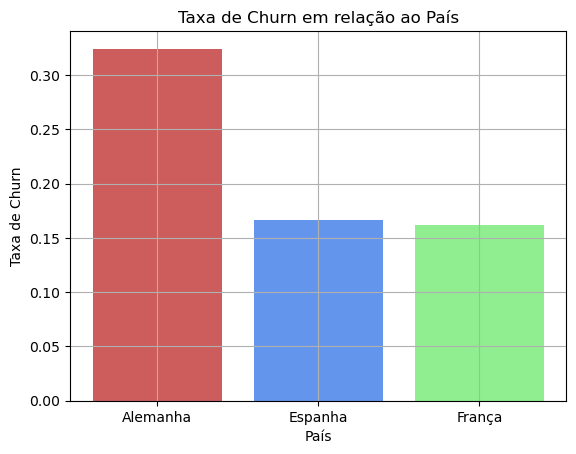

In [12]:
# Plota país em relação a variável alvo
x = df_plot['Geography']
y = df_plot['Exited']

plt.bar(x,y,color=colors)
plt.title('Taxa de Churn em relação ao País')
plt.xlabel('País')
plt.ylabel('Taxa de Churn')
plt.grid()
plt.show()

* Variável Cartão de Crédito

In [13]:
# Renomeia para facilitar a visualização e interpretação
df['HasCrCard'] = df['HasCrCard'].replace([0,1], ['Não','Sim'])

# Agrupando pela variável 'HasCrCard' e calculando média
df_plot = df.groupby('HasCrCard')['Exited'].mean().reset_index()
df_plot

,HasCrCard,Exited
0,Não,0.208149
1,Sim,0.201843


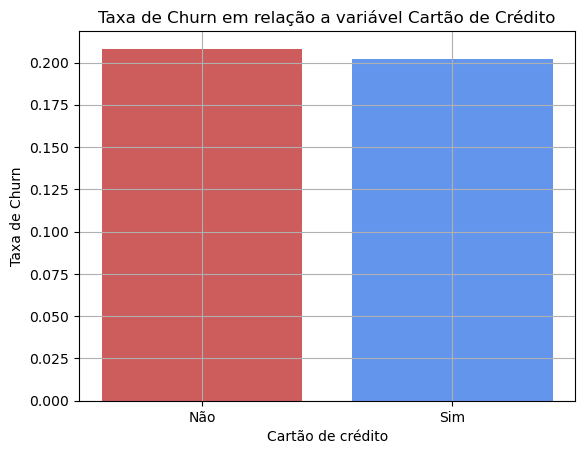

In [14]:
# Plota Cartão de crédito em relação a variável alvo
x = df_plot['HasCrCard']
y = df_plot['Exited']

plt.bar(x, y, color=colors)
plt.title('Taxa de Churn em relação a variável Cartão de Crédito')
plt.xlabel('Cartão de crédito')
plt.ylabel('Taxa de Churn')
plt.grid()
plt.show()

* Variável Membro Ativo

In [15]:
# Renomeia para facilitar a visualização e interpretação
df['IsActiveMember'] = df['IsActiveMember'].replace([0,1], ['Não','Sim'])

# Agrupando pela variável 'IsActiveMember' e calculando média
df_plot = df.groupby('IsActiveMember')['Exited'].mean().reset_index() 
df_plot

,IsActiveMember,Exited
0,Não,0.268509
1,Sim,0.142691


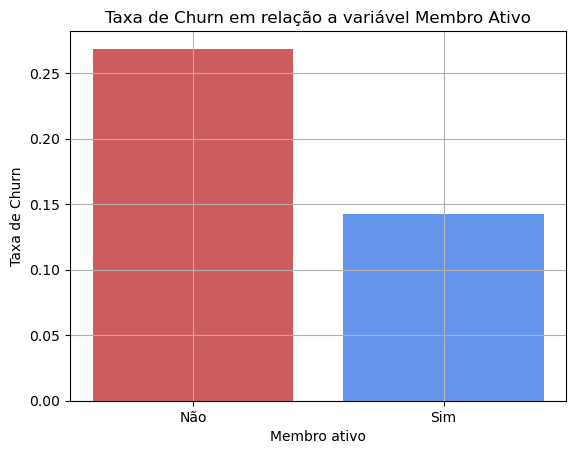

In [16]:
# Plota Membro ativo em relação a variável alvo
x = df_plot['IsActiveMember']
y = df_plot['Exited']

plt.bar(x,y,color=colors)
plt.title('Taxa de Churn em relação a variável Membro Ativo')
plt.xlabel('Membro ativo')
plt.ylabel('Taxa de Churn')
plt.grid()
plt.show()

### Variáveis numéricas


In [17]:
df_cont = df[['Age', 'Balance', 'Tenure', 'NumOfProducts', 'EstimatedSalary']]
df_cont

,Age,Balance,Tenure,NumOfProducts,EstimatedSalary
0,42,0.00,2,1,101348.88
1,41,83807.86,1,1,112542.58
2,42,159660.80,8,3,113931.57
3,39,0.00,1,2,93826.63
4,43,125510.82,2,1,79084.10
...,...,...,...,...,...
9995,39,0.00,5,2,96270.64
9996,35,57369.61,10,1,101699.77
9997,36,0.00,7,1,42085.58
9998,42,75075.31,3,2,92888.52


* Matriz de Correlação

A matriz de correlação apresenta a correlação entre cada uma das variáveis.

Com esse gráfico é possível notar, por exemplo, que a correlação entre "Balance" e "NumOfProducts" é de -0.3. Isso significa que quanto maior o patrimônio do cliente, menos produtos ele tende a ter, numa ordem de 0.3 de proporção.

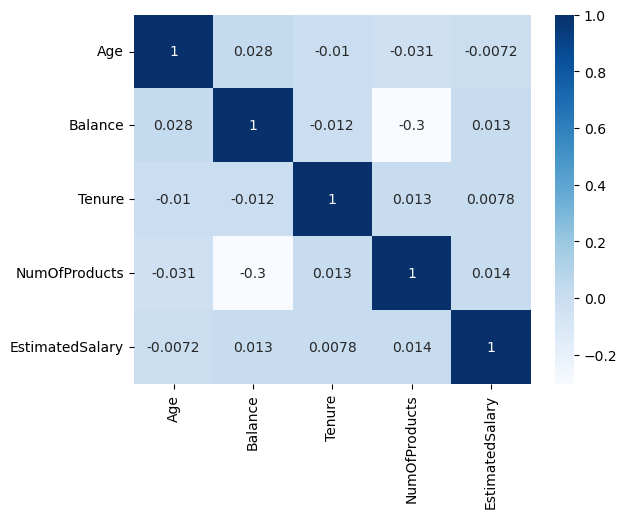

In [18]:
sns.heatmap(df_cont.corr(), annot = True, cmap='Blues');

***
Os gráficos de barra a seguir relacionam a quantidade de clientes que sairam do banco com cada uma das variáveis numéricas.

Por exemplo, para a variável NumOfProducts, nota-se que quanto maior a quantidade de produtos tem o cliente, maior a taxa de Churn.

* **Variável Número de Produtos**

In [19]:
df_plot = df.groupby('NumOfProducts')['Exited'].mean().reset_index()
df_plot

,NumOfProducts,Exited
0,1,0.277144
1,2,0.075817
2,3,0.827068
3,4,1.000000


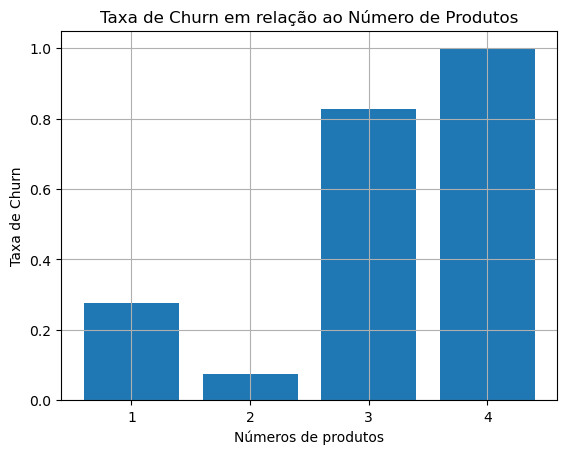

In [20]:
# Número de produtos em relação a variável alvo
x = df_plot['NumOfProducts']
y = df_plot['Exited']

plt.bar(x, y)
plt.title('Taxa de Churn em relação ao Número de Produtos')
plt.xlabel('Números de produtos')
plt.ylabel('Taxa de Churn')
plt.xticks(x, (1,2,3,4))
plt.grid()
plt.show()

Quanto maior o número de produtos maior a taxa de Churn. 

* **Variável Tenure**


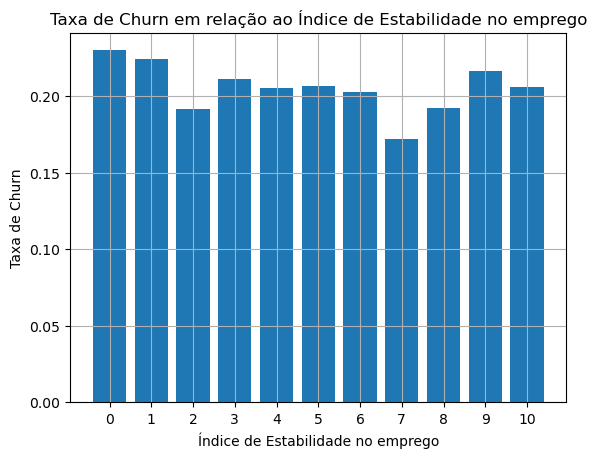

In [21]:
df_plot = df.groupby('Tenure')['Exited'].mean().reset_index() 

# Número de produtos em relação a variável IsActiveMember
x = df_plot['Tenure']
y = df_plot['Exited']

plt.bar(x, y)
plt.title('Taxa de Churn em relação ao Índice de Estabilidade no emprego')
plt.xlabel('Índice de Estabilidade no emprego')
plt.ylabel('Taxa de Churn')
plt.xticks(x, (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10))
plt.grid()
plt.show()

O nível de estabilidade do emprego parece não influenciar a taxa de Churn. Porém, observa-se a taxa de Churn um pouco mais elevada em clientes com índice de estabilidade 0 e 1.


****
Com os boxplot a seguir pode-se observar a distribuição dos dados de cada uma das variáveis numéricas em quartis.


* **Variável Saldo Bancário**

Exited_cat
Não    72745.296779
Sim    91108.539337
Name: Balance, dtype: float64


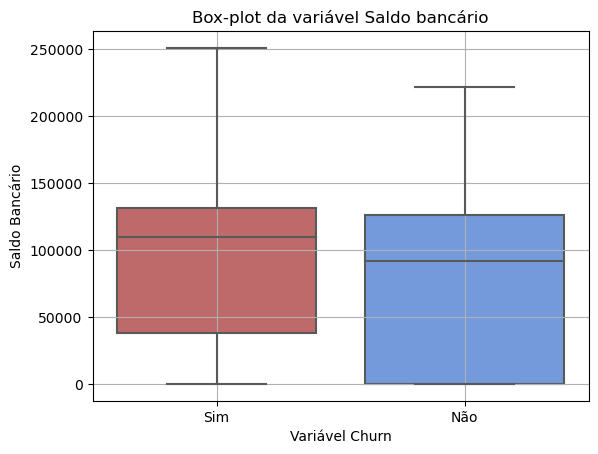

In [22]:
# Plota boxplot com Saldo bancário e Churn
print(df.groupby(['Exited_cat'])['Balance'].mean())

sns.boxplot(x="Exited_cat", y="Balance", data=df, palette=colors)
plt.title('Box-plot da variável Saldo bancário')
plt.xlabel('Variável Churn')
plt.ylabel('Saldo Bancário')
plt.grid()
plt.show()


 Clientes que cancelaram os serviços bancários possui um saldo bancários maior do que aqueles clientes que não cancelaram o serviço. 

* **Variável Salário Estimado**

Exited
0     99738.391772
1    101465.677531
Name: EstimatedSalary, dtype: float64


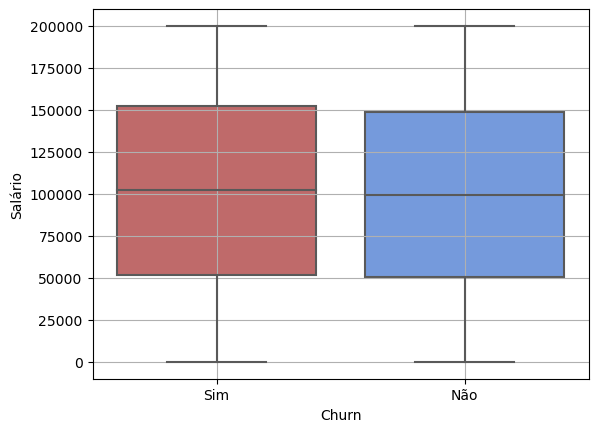

In [23]:
print(df.groupby(['Exited'])['EstimatedSalary'].mean())

# Plota boxplot de Salario Estimado pela variável alvo
sns.boxplot(x="Exited_cat", y="EstimatedSalary", data=df,palette=colors)
plt.xlabel('Churn')
plt.ylabel('Salário')
plt.grid()
plt.show()

O salário estimado parece não influenciar no cancelamento ou não do serviço bancário.

* **Variável Idade**

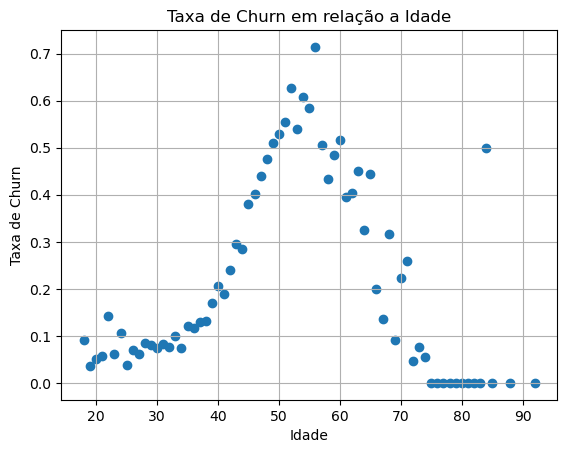

In [24]:
df_plot = df.groupby('Age')['Exited'].mean().reset_index()

# Número de produtos em relação a variável alvo
x = df_plot['Age']
y = df_plot['Exited']
plt.scatter(x,y)
plt.title('Taxa de Churn em relação a Idade')
plt.xlabel('Idade')
plt.ylabel('Taxa de Churn')
plt.grid()
plt.show()

Exited
0    37.408389
1    44.837997
Name: Age, dtype: float64


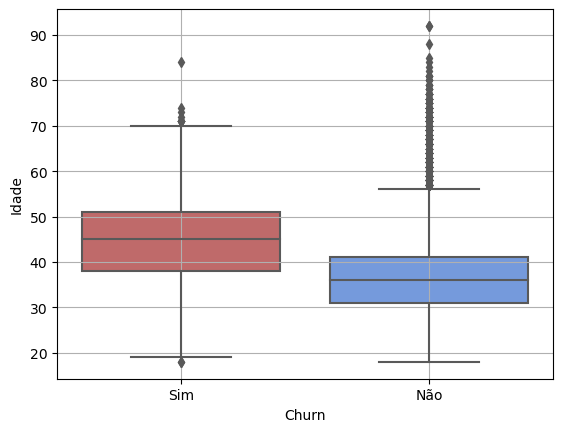

In [25]:
print(df.groupby(['Exited'])['Age'].mean())

# Plota boxplot Idade pelo Churn
sns.boxplot(x="Exited_cat", y="Age", data=df,palette=colors)
plt.xlabel('Churn')
plt.ylabel('Idade')
plt.grid()
plt.show()

* Variável Escore de Crédito

Exited
0    651.853196
1    645.351497
Name: CreditScore, dtype: float64

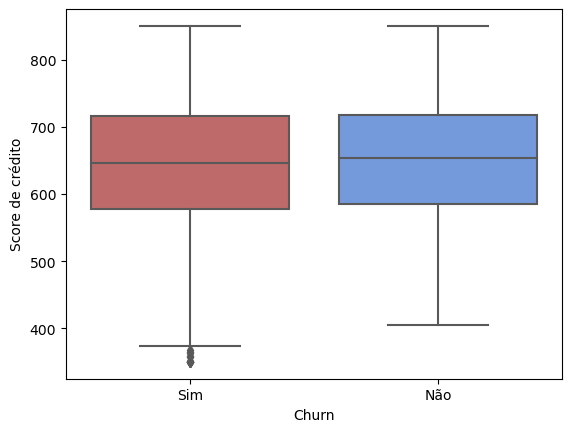

In [26]:
# Plota boxplot score do cliente em relação ao churn
sns.boxplot(x="Exited_cat", y="CreditScore", data=df, palette=colors);
plt.xlabel('Churn');
plt.ylabel('Score de crédito');
df.groupby(['Exited'])['CreditScore'].mean()

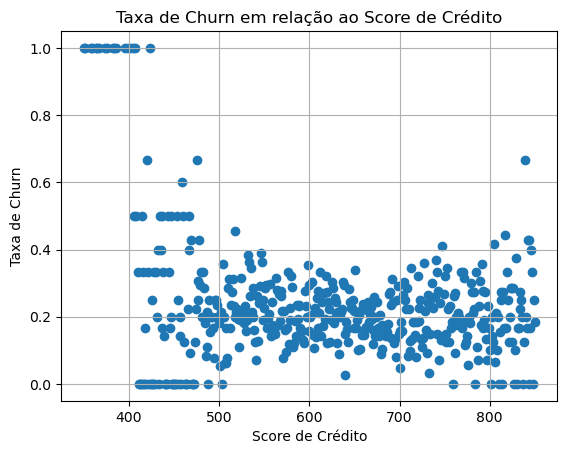

In [27]:
# Plota Número de produtos em relação a variável churn
df_plot = df.groupby('CreditScore')['Exited'].mean().reset_index()

x = df_plot['CreditScore']
y = df_plot['Exited']

plt.scatter(x,y)
plt.title('Taxa de Churn em relação ao Score de Crédito')
plt.xlabel('Score de Crédito')
plt.ylabel('Taxa de Churn')
plt.grid()
plt.show()

***
# Conclusão

Analisando o histórico de clientes, observamos algumas características entre os clientes que cancelaram o serviço (alta taxa de Churn). 

- Sexo feminino
- Clientes da Alemanha
- Membro não ativo
- Com alto número de produtos (3 ou 4)
- Com baixa estabilidade de emprego (pequena diferença)
- Com saldo bancário elevado
- Com idade entre 50 e 60 anos
- Score de crédito baixo (pequena diferença)

Sem relação aparente:
- Se tem cartão de crédito
- Salário estimado
